<a href="https://colab.research.google.com/github/Benylaode/ad_new_model/blob/main/Copy_of_Pembuatan_dan_Pelatihan_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Lakukan Import beberapa depedensi yang dibutuhkan**

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.multioutput import ClassifierChain
from sklearn.linear_model import LogisticRegression
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline  # Pipeline khusus imblearn (bukan sklearn!)
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import MultiLabelBinarizer
from ipywidgets import widgets, VBox, Button, Output
from IPython.display import display
from collections import defaultdict
from imblearn.over_sampling import RandomOverSampler
import joblib

**load data hasil ADVERTASING**

Deskripsi Dataset
Dataset ini berisi informasi tentang interaksi pengguna dengan berbagai kampanye iklan digital. Setiap baris mewakili satu interaksi pengguna terhadap suatu iklan dan memuat atribut-atribut berikut:

user_id: ID unik pengguna.

timestamp: Waktu saat interaksi dengan iklan terjadi.

device_type: Jenis perangkat yang digunakan pengguna, seperti Mobile, Desktop, atau Tablet.

location: Lokasi geografis pengguna, seperti USA, UK, Canada, atau negara lain.

age_group: Kelompok usia pengguna, seperti 18-24, 25-34, 35-44, 45-54, dan 55+.

gender: Jenis kelamin pengguna, yaitu Male atau Female.

ad_id: ID unik untuk masing-masing iklan.

content_type: Jenis konten iklan, dapat berupa Text, Image, atau Video.

ad_topic: Topik atau kategori iklan, misalnya Fashion, Electronics, Automotive, dll.

ad_target_audience: Segmentasi target audiens iklan, seperti Tech Enthusiasts, Young Adults, Family Oriented, dan sebagainya.

click_through_rate: Rasio klik terhadap tayangan iklan (CTR).

conversion_rate: Rasio klik yang menghasilkan aksi (misalnya pembelian atau pendaftaran).

engagement_level: Tingkat interaksi pengguna dengan iklan, seperti Liked, Shared, atau Commented.

view_time: Lama waktu (dalam detik) pengguna melihat iklan.

cost_per_click: Biaya yang dibayar pengiklan per klik yang diperoleh.

click_through_rate.1: Duplikat dari click_through_rate (kemungkinan hasil transformasi data, bisa dibersihkan).

conversion_rate.1: Duplikat dari conversion_rate (kemungkinan hasil transformasi data, bisa dibersihkan).

ROI_Category: Kategori Return on Investment (ROI), seperti Low, Medium, atau High.

calculated_ROI: Nilai ROI yang dihitung dari rasio antara conversion_rate dan cost_per_click atau metrik lainnya.

Performance: Kategori performa keseluruhan iklan dalam interaksi tersebut, dengan label seperti Low, Medium, dan High.

cell ini melihat bagian head dari dataset yang ada sembari memperhatiakn kondisi dari atributnya

In [6]:
df = pd.read_csv("Advertising_dataset_with_Performance_Label.csv")
print(df.head())

   user_id         timestamp device_type location age_group  gender  ad_id  \
0      184  12/21/2025 23:32     Desktop      USA       55+  Female  A5604   
1      425  12/18/2025 18:29     Desktop       UK     35-44  Female  A4649   
2      919    8/18/2025 4:50      Mobile  Germany     45-54    Male  A6448   
3      336   1/28/2025 18:24      Mobile   Canada       55+    Male  A1966   
4      607  11/17/2025 13:07      Mobile   Canada     45-54    Male  A5216   

  content_type     ad_topic ad_target_audience  click_through_rate  \
0         Text       Health       Young Adults            0.069629   
1        Image      Fashion    Family Oriented            0.043579   
2        Video   Automotive      Travel Lovers            0.038420   
3        Image      Fashion       Young Adults            0.043683   
4        Video  Electronics    Family Oriented            0.042209   

   conversion_rate engagement_level  view_time  cost_per_click  \
0           0.0366            Liked         

metode di atas saya lakukan di exel sehingga menghasilan data baru yang saya gunakan untuk pelatihan

**MENCOBA SEDIKIT MELAKUKAN DATA UNDERSATANDING**

cell ini melihat bagaimana sebaran model dan mengetahui tipe data pada setiap colom

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   user_id               1000 non-null   int64  
 1   timestamp             1000 non-null   object 
 2   device_type           1000 non-null   object 
 3   location              1000 non-null   object 
 4   age_group             1000 non-null   object 
 5   gender                1000 non-null   object 
 6   ad_id                 1000 non-null   object 
 7   content_type          1000 non-null   object 
 8   ad_topic              1000 non-null   object 
 9   ad_target_audience    1000 non-null   object 
 10  click_through_rate    1000 non-null   float64
 11  conversion_rate       1000 non-null   float64
 12  engagement_level      1000 non-null   object 
 13  view_time             1000 non-null   int64  
 14  cost_per_click        1000 non-null   float64
 15  click_through_rate.1  

memakai fungsi visualisasi setiap data kategorikal

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def visualisasi_kolom(df, nama_kolom):
    if df[nama_kolom].dtype != 'object':
        df[nama_kolom] = df[nama_kolom].astype(str)


    df = df.explode(nama_kolom)
    top_n = 15
    Spend_Amount_counts = df[nama_kolom].value_counts().head(top_n).reset_index()
    Spend_Amount_counts.columns = [nama_kolom, 'Count']

    Spend_Amount_counts = Spend_Amount_counts.sort_values('Count', ascending=False)

    plt.figure(figsize=(12, 8))
    sns.set_style("whitegrid")

    bar_plot = sns.barplot(
        x='Count',
        y=nama_kolom,
        data=Spend_Amount_counts,
        palette='viridis',
        alpha=0.7
    )

    for i, (value, name) in enumerate(zip(Spend_Amount_counts['Count'], Spend_Amount_counts[nama_kolom])):
        bar_plot.text(value + 0.5, i, f'{value}', ha='left', va='center', fontsize=10)

    plt.title(f'jumlah nilai unik dari data {nama_kolom}',
              fontsize=16, pad=20, fontweight='bold')
    plt.xlabel('Number of Titles', fontsize=12)
    plt.ylabel(nama_kolom, fontsize=12)
    plt.xlim(0, Spend_Amount_counts['Count'].max() * 1.1)
    sns.despine(left=True, bottom=True)

    plt.tight_layout()
    plt.show()

mencoba memisahkan data kategorikalnya

In [9]:
categorical_list = [
     "device_type",
     "location",
     "age_group",
     "gender",
     "content_type",
     "ad_topic",
     "ad_target_audience",
     "engagement_level",
     "Performance",
]

melihat persebaran pada semua data kategorikal apakah ada yang tidak seimbang

<ipython-input-8-b2b74c8869cc>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(


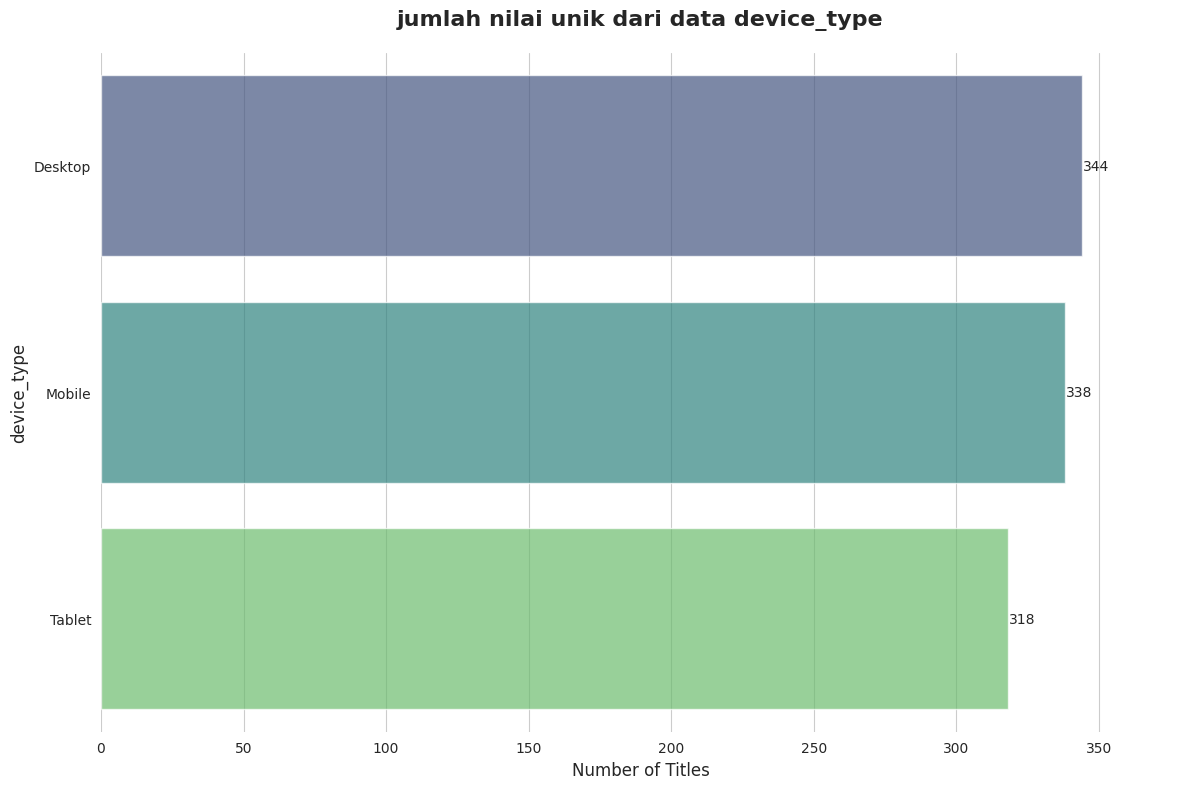

<ipython-input-8-b2b74c8869cc>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(


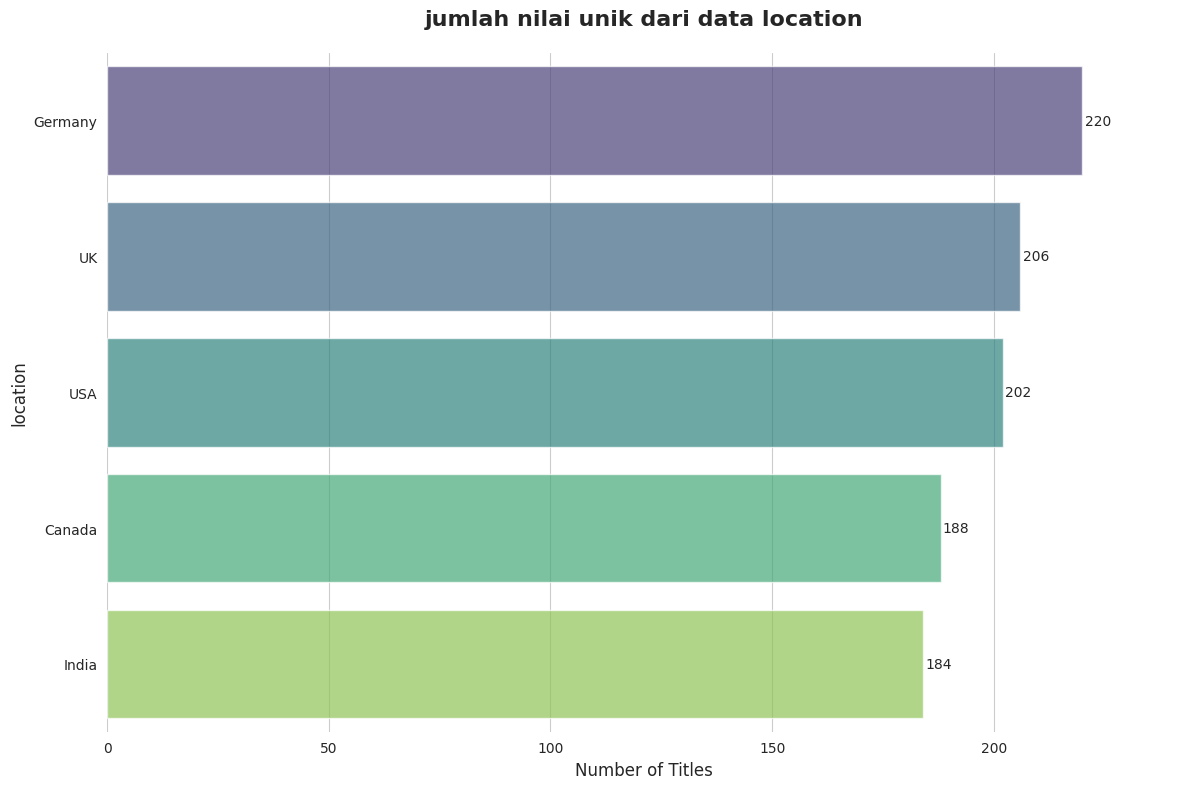

<ipython-input-8-b2b74c8869cc>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(


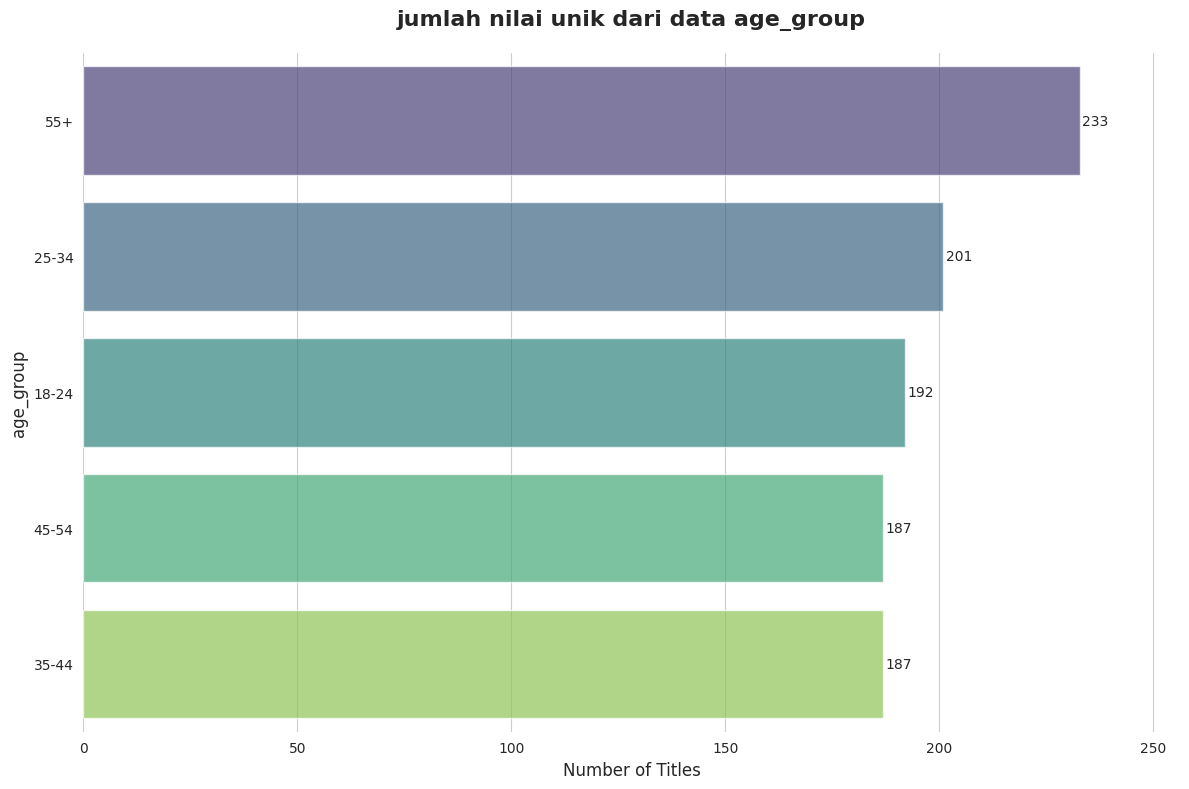

<ipython-input-8-b2b74c8869cc>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(


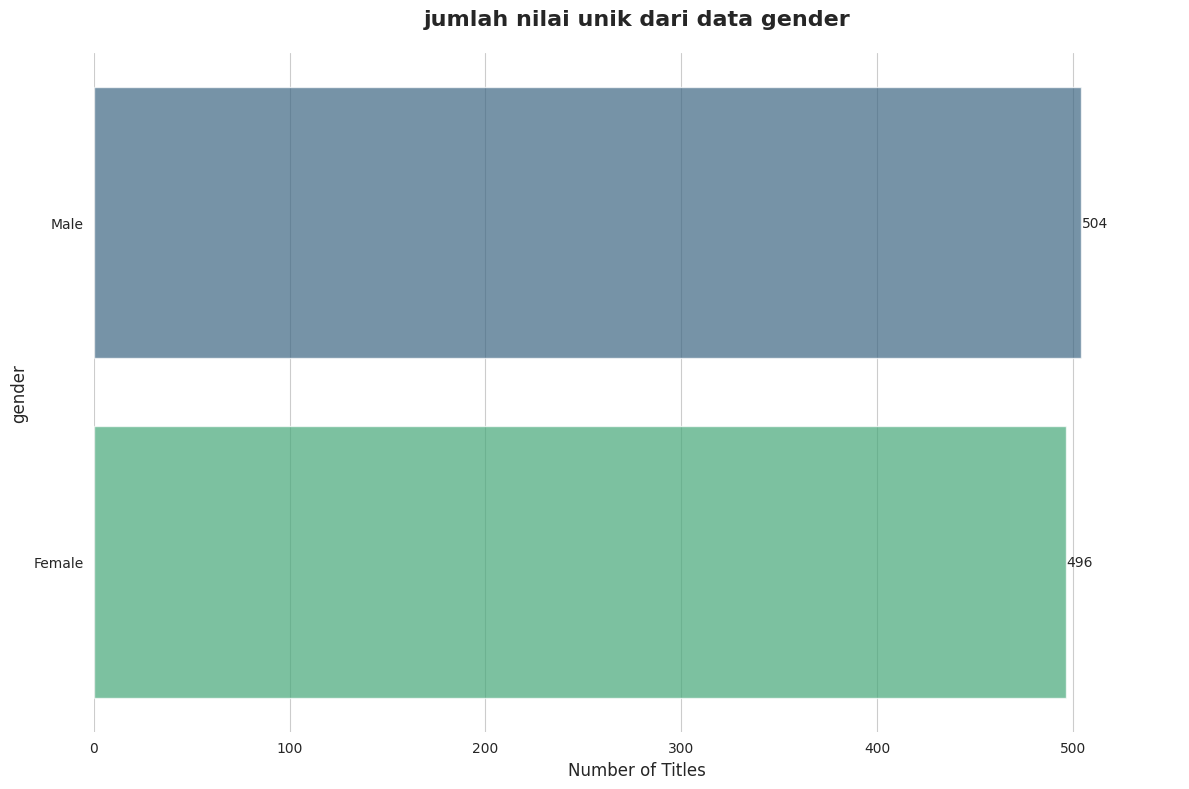

<ipython-input-8-b2b74c8869cc>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(


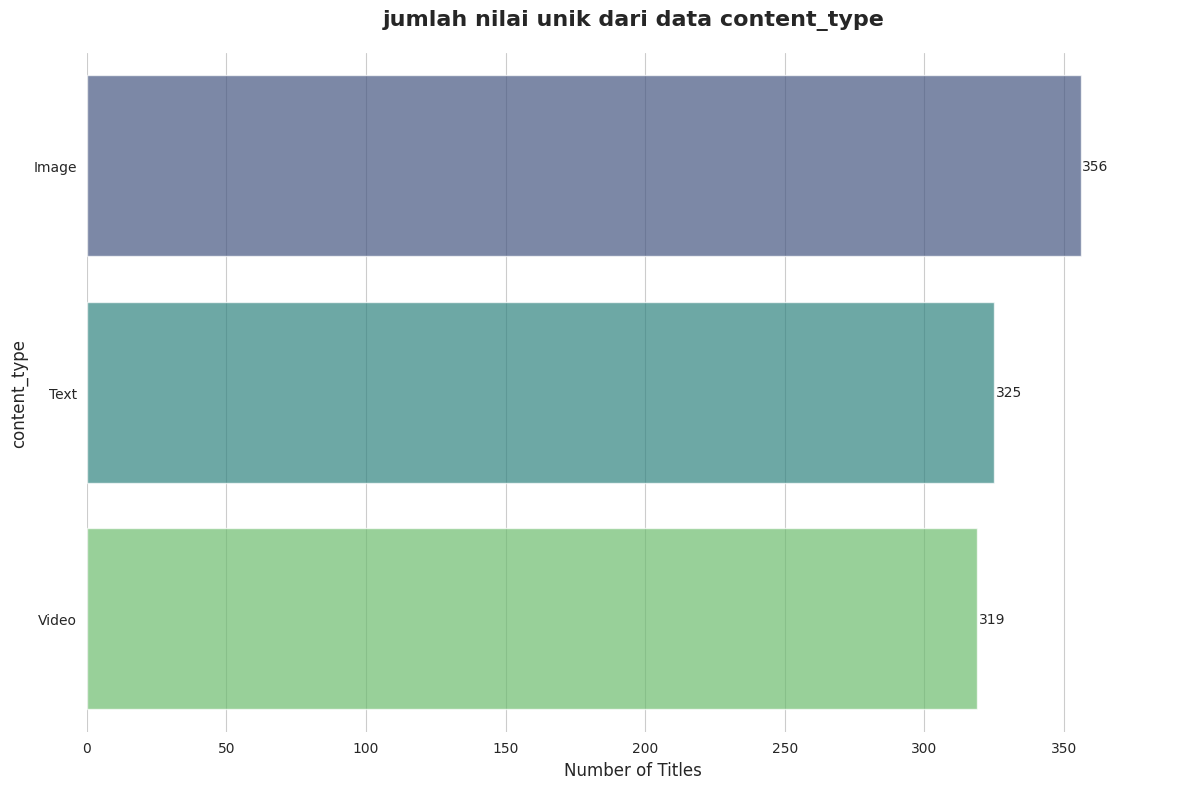

<ipython-input-8-b2b74c8869cc>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(


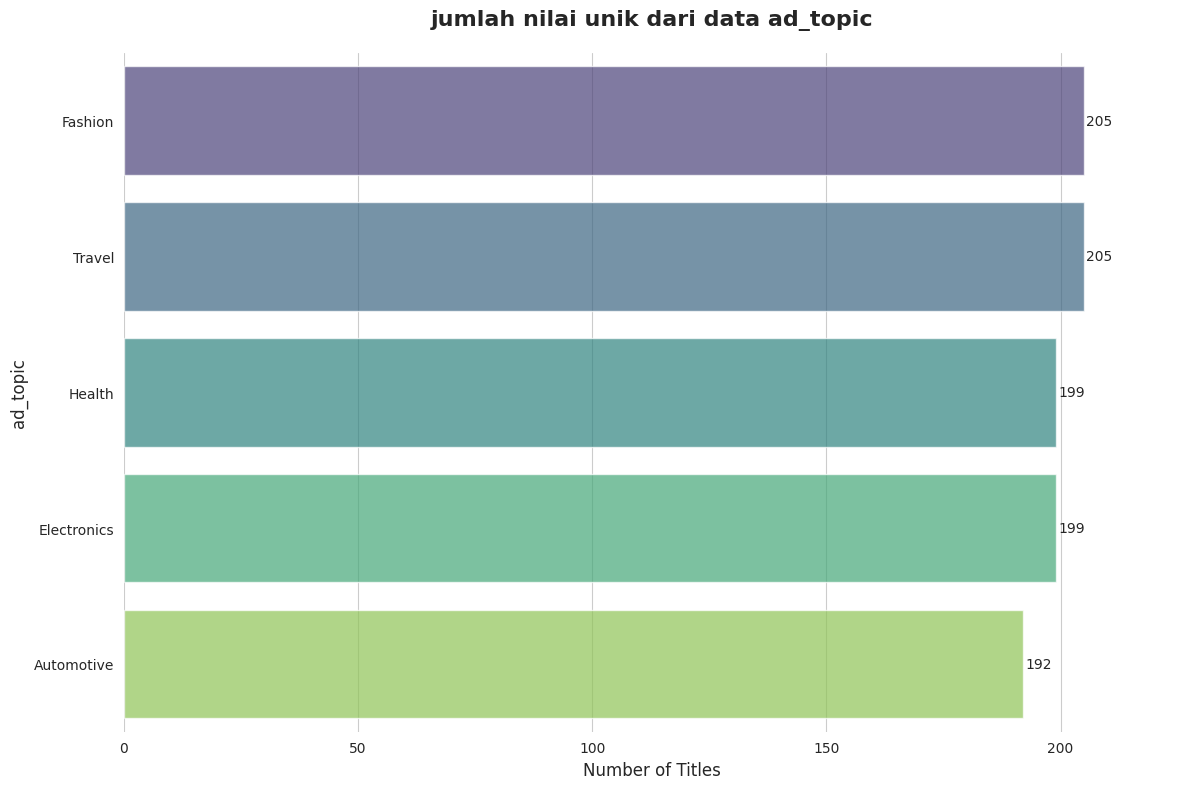

<ipython-input-8-b2b74c8869cc>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(


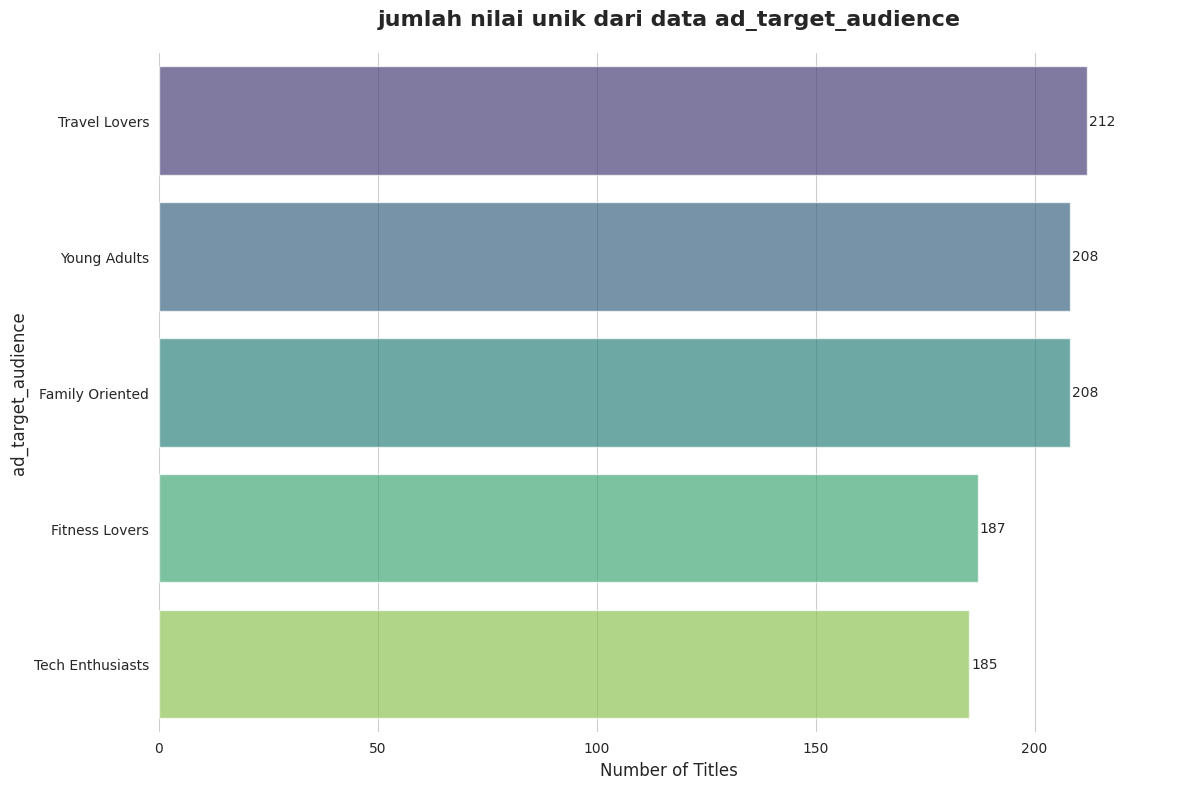

<ipython-input-8-b2b74c8869cc>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(


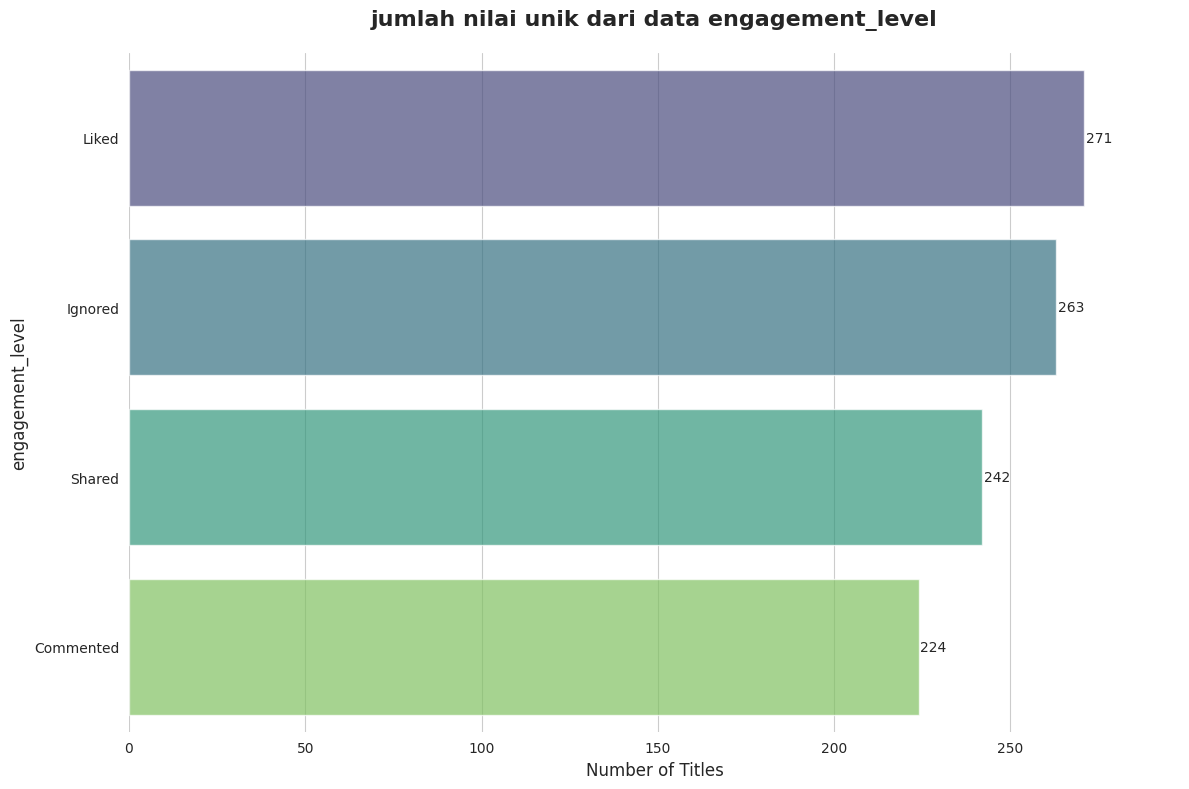

<ipython-input-8-b2b74c8869cc>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(


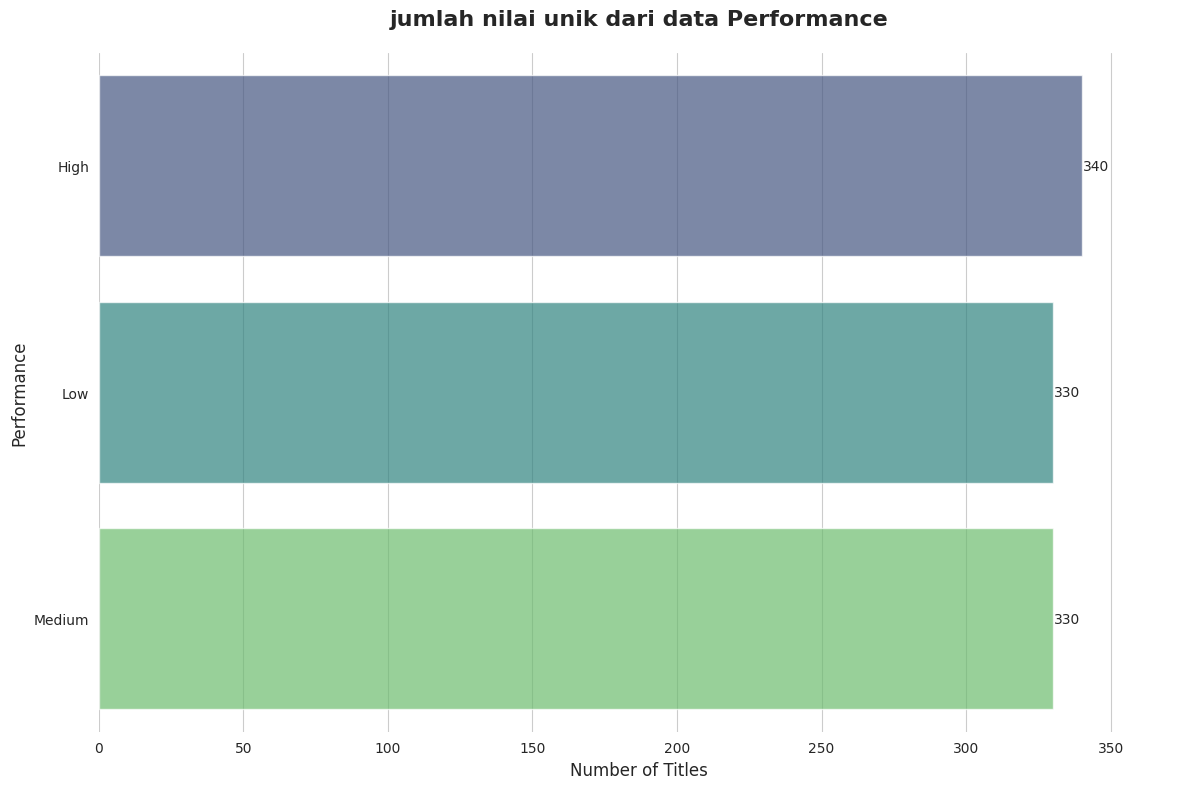

In [10]:
for column in categorical_list:
    visualisasi_kolom(df, column)

hasilnya menunjukan data cukup tersebar merata untuk kategorikalnnya

**mencoba melihat bagaiman dengan data numerical**

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def visualisasi_numerikal(df, nama_kolom):

    if nama_kolom not in df.columns:
        print(f"Kolom '{nama_kolom}' tidak ada dalam DataFrame.")
        return

    if df[nama_kolom].dtype == 'object':
        print(f"Kolom '{nama_kolom}' bukan tipe data numerikal.")
        return

    plt.figure(figsize=(10, 6))
    sns.set_style("whitegrid")

    sns.histplot(data=df, x=nama_kolom, kde=True, color='skyblue', bins=30) # Adjust bins as needed

    plt.title(f'Distribusi Data: {nama_kolom}', fontsize=16, pad=20, fontweight='bold')
    plt.xlabel(nama_kolom, fontsize=12)
    plt.ylabel('Frekuensi', fontsize=12)
    sns.despine(left=True, bottom=True)

    plt.tight_layout()
    plt.show()


In [12]:
numerical_columns_list = df.select_dtypes(include=np.number).columns.tolist()


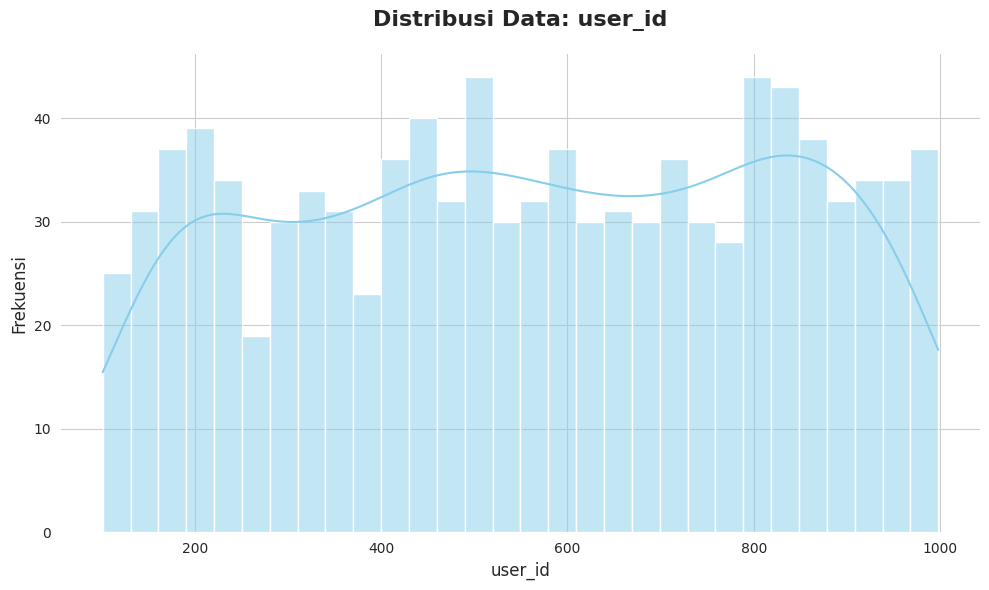

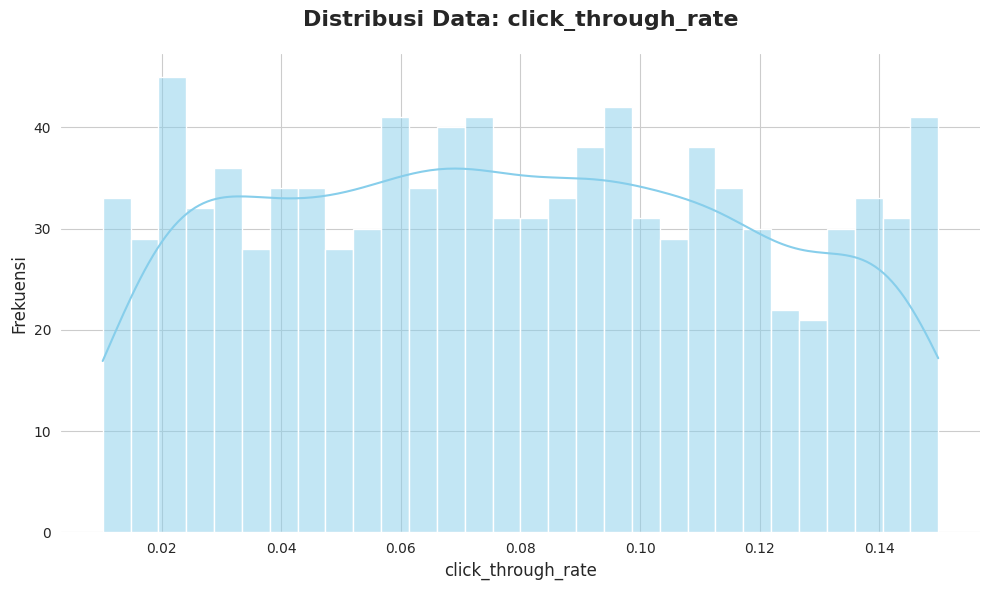

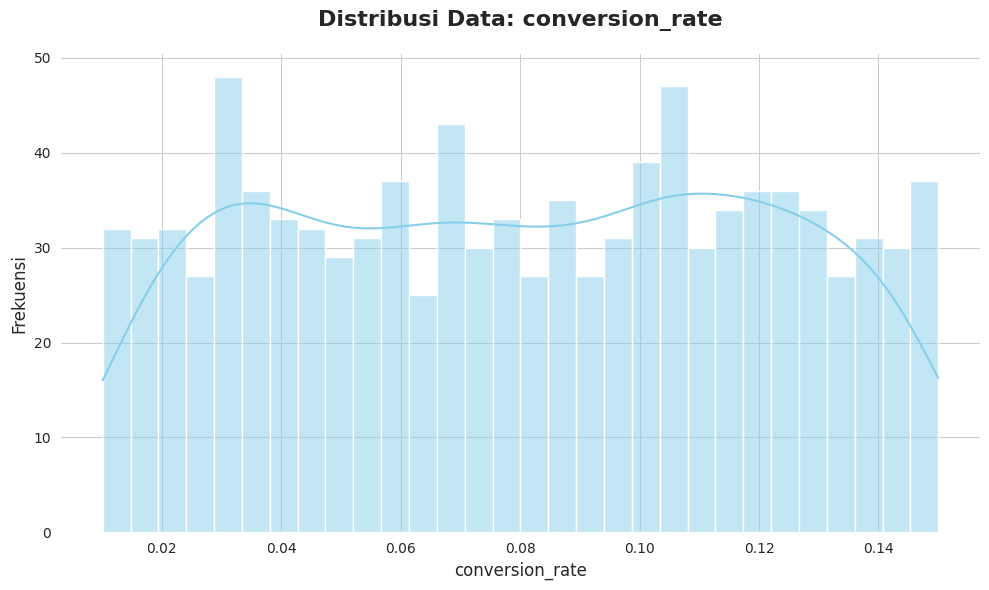

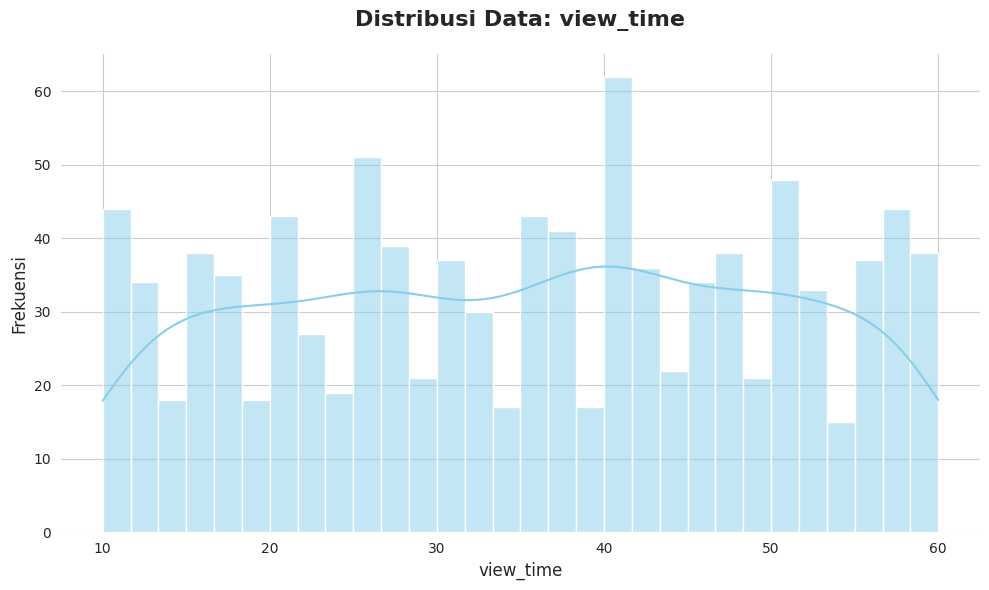

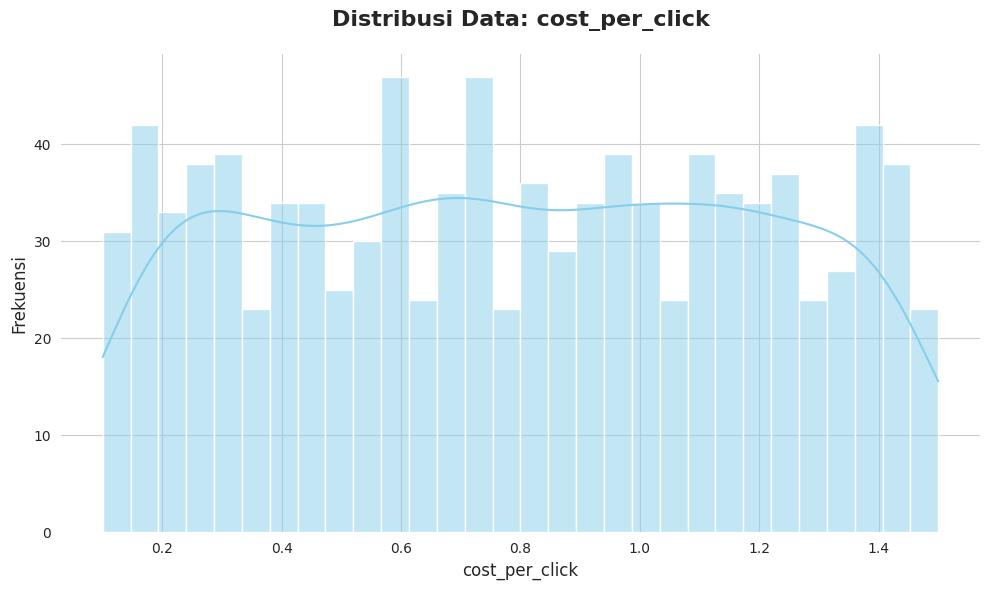

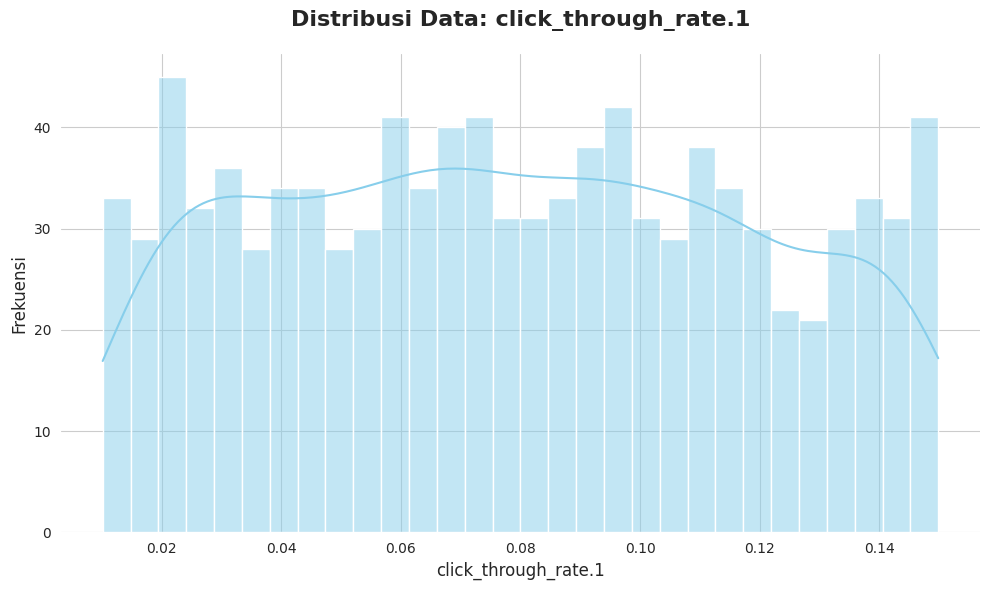

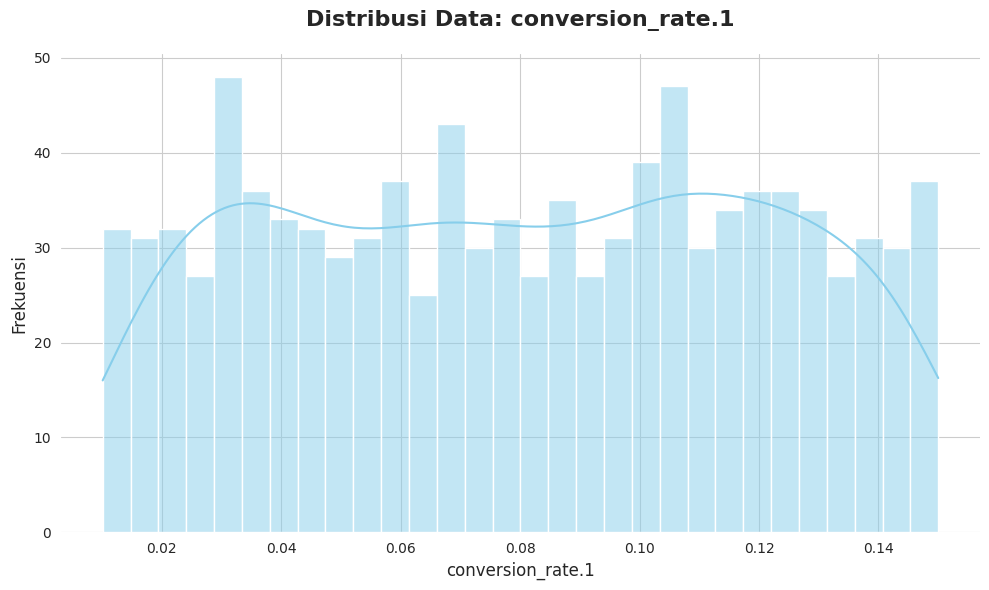

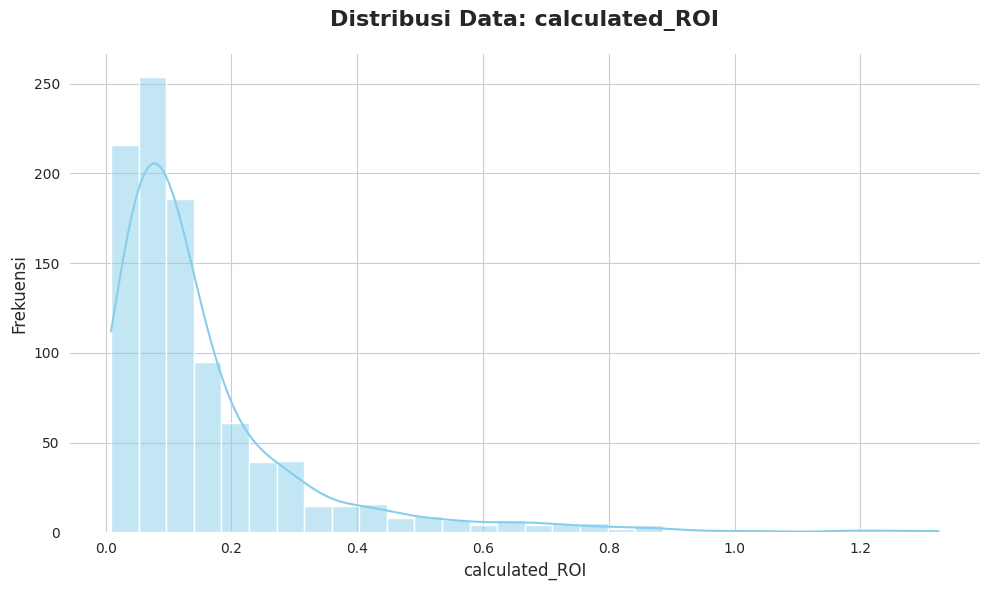

In [13]:
for column in numerical_columns_list:
    visualisasi_numerikal(df, column)

data numerical cenderung bagis dengan persebran yang baik kecuali untuk kolom calculated_ROi

data di atas adalah data yang melihat hasil performa dari 1000 iklan yang ada dengana melihat perkembangan performa dari masing-masing iklan dengan berbagai kategori dan sasaran audience

**melakukan  pembersihan**

1. langkah pertama adalah mengecek nilai null/nan

In [14]:
for column in df.columns:
    num_null_nan = df[column].isnull().sum()
    print(f"There are {num_null_nan} null/NaN values in the '{column}' column.")

There are 0 null/NaN values in the 'user_id' column.
There are 0 null/NaN values in the 'timestamp' column.
There are 0 null/NaN values in the 'device_type' column.
There are 0 null/NaN values in the 'location' column.
There are 0 null/NaN values in the 'age_group' column.
There are 0 null/NaN values in the 'gender' column.
There are 0 null/NaN values in the 'ad_id' column.
There are 0 null/NaN values in the 'content_type' column.
There are 0 null/NaN values in the 'ad_topic' column.
There are 0 null/NaN values in the 'ad_target_audience' column.
There are 0 null/NaN values in the 'click_through_rate' column.
There are 0 null/NaN values in the 'conversion_rate' column.
There are 0 null/NaN values in the 'engagement_level' column.
There are 0 null/NaN values in the 'view_time' column.
There are 0 null/NaN values in the 'cost_per_click' column.
There are 0 null/NaN values in the 'click_through_rate.1' column.
There are 0 null/NaN values in the 'conversion_rate.1' column.
There are 0 null

nampaknya tidak ada nilai null/nan yang di temukan jadi data aman untuk kategori ini

2. Langkah dua adalah dengan melihat oulayer di data kolom numerikdengan menggunakan boxplot

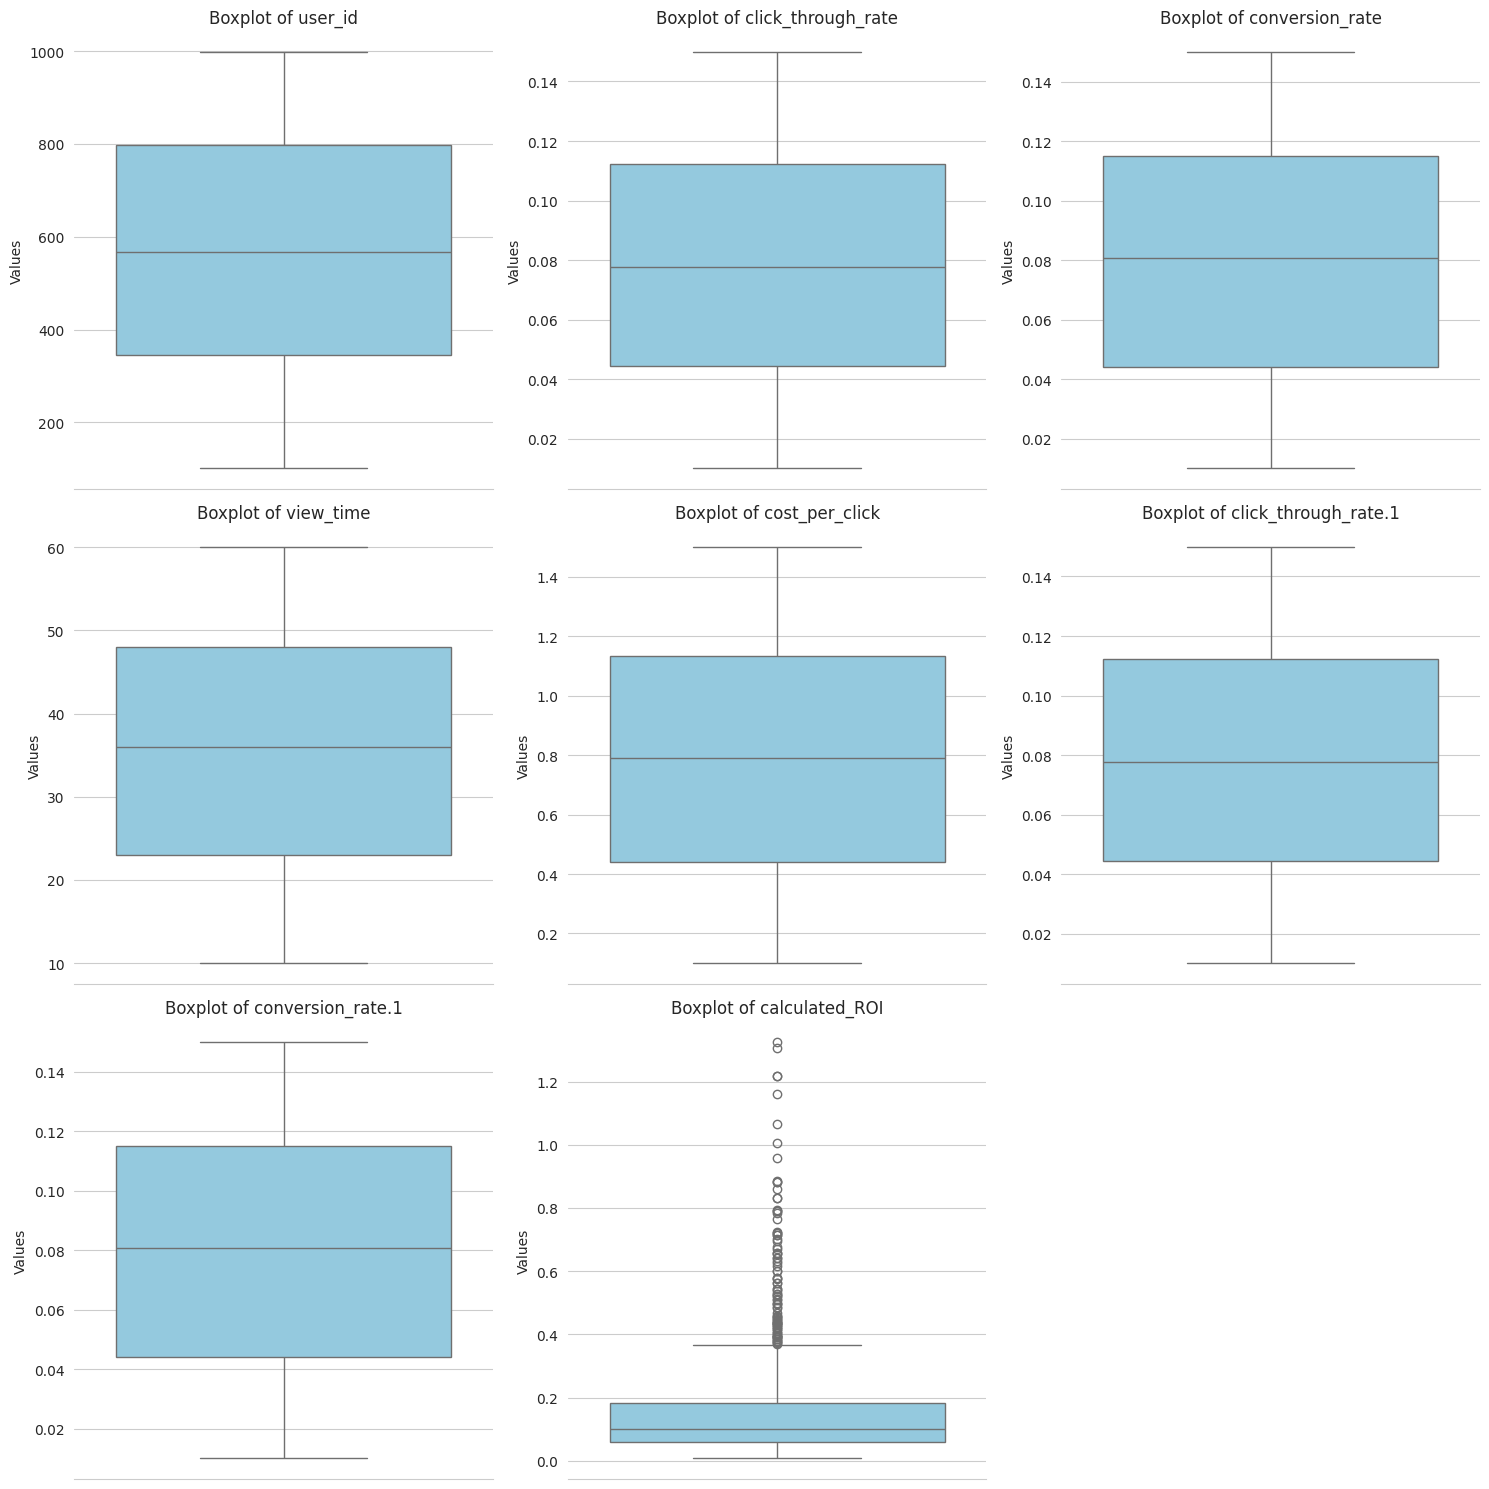

In [15]:
def boxplot_numeric(df, numeric_cols):
  n_cols = 3
  n_rows = len(numerical_columns_list) // n_cols + 1

  plt.figure(figsize=(15, 5*n_rows))

  for i, col in enumerate(numerical_columns_list, 1):
      if not df[col].isna().all():
          plt.subplot(n_rows, n_cols, i)
          sns.boxplot(y=df[col], color='skyblue')
          plt.title(f'Boxplot of {col}', fontsize=12)
          plt.ylabel('Values')
          sns.despine(left=True)

  plt.tight_layout()
  plt.show()

boxplot_numeric(df, numerical_columns_list)

nampaknya bagian calculated_ROI memiliki sedikit banyak outlayer

karena data hanya data dari kolom calculate_ROI yang memiliki banyak data outlayer maka itu saja yang akan kita atasi







menggunakan metode Q1 dan Q3 untuk memotong data

In [16]:
Q1 = df["calculated_ROI"].quantile(0.25)
Q3 = df["calculated_ROI"].quantile(0.75)
IQR = Q3 - Q1

In [17]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[
    (df["calculated_ROI"] >= lower_bound) &
    (df["calculated_ROI"] <= upper_bound)
]

In [18]:
from scipy.stats.mstats import winsorize
df["calculated_ROI"] = winsorize(df["calculated_ROI"], limits=[0.1, 0.1])

<ipython-input-18-3d7df20e5a65>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["calculated_ROI"] = winsorize(df["calculated_ROI"], limits=[0.1, 0.1])


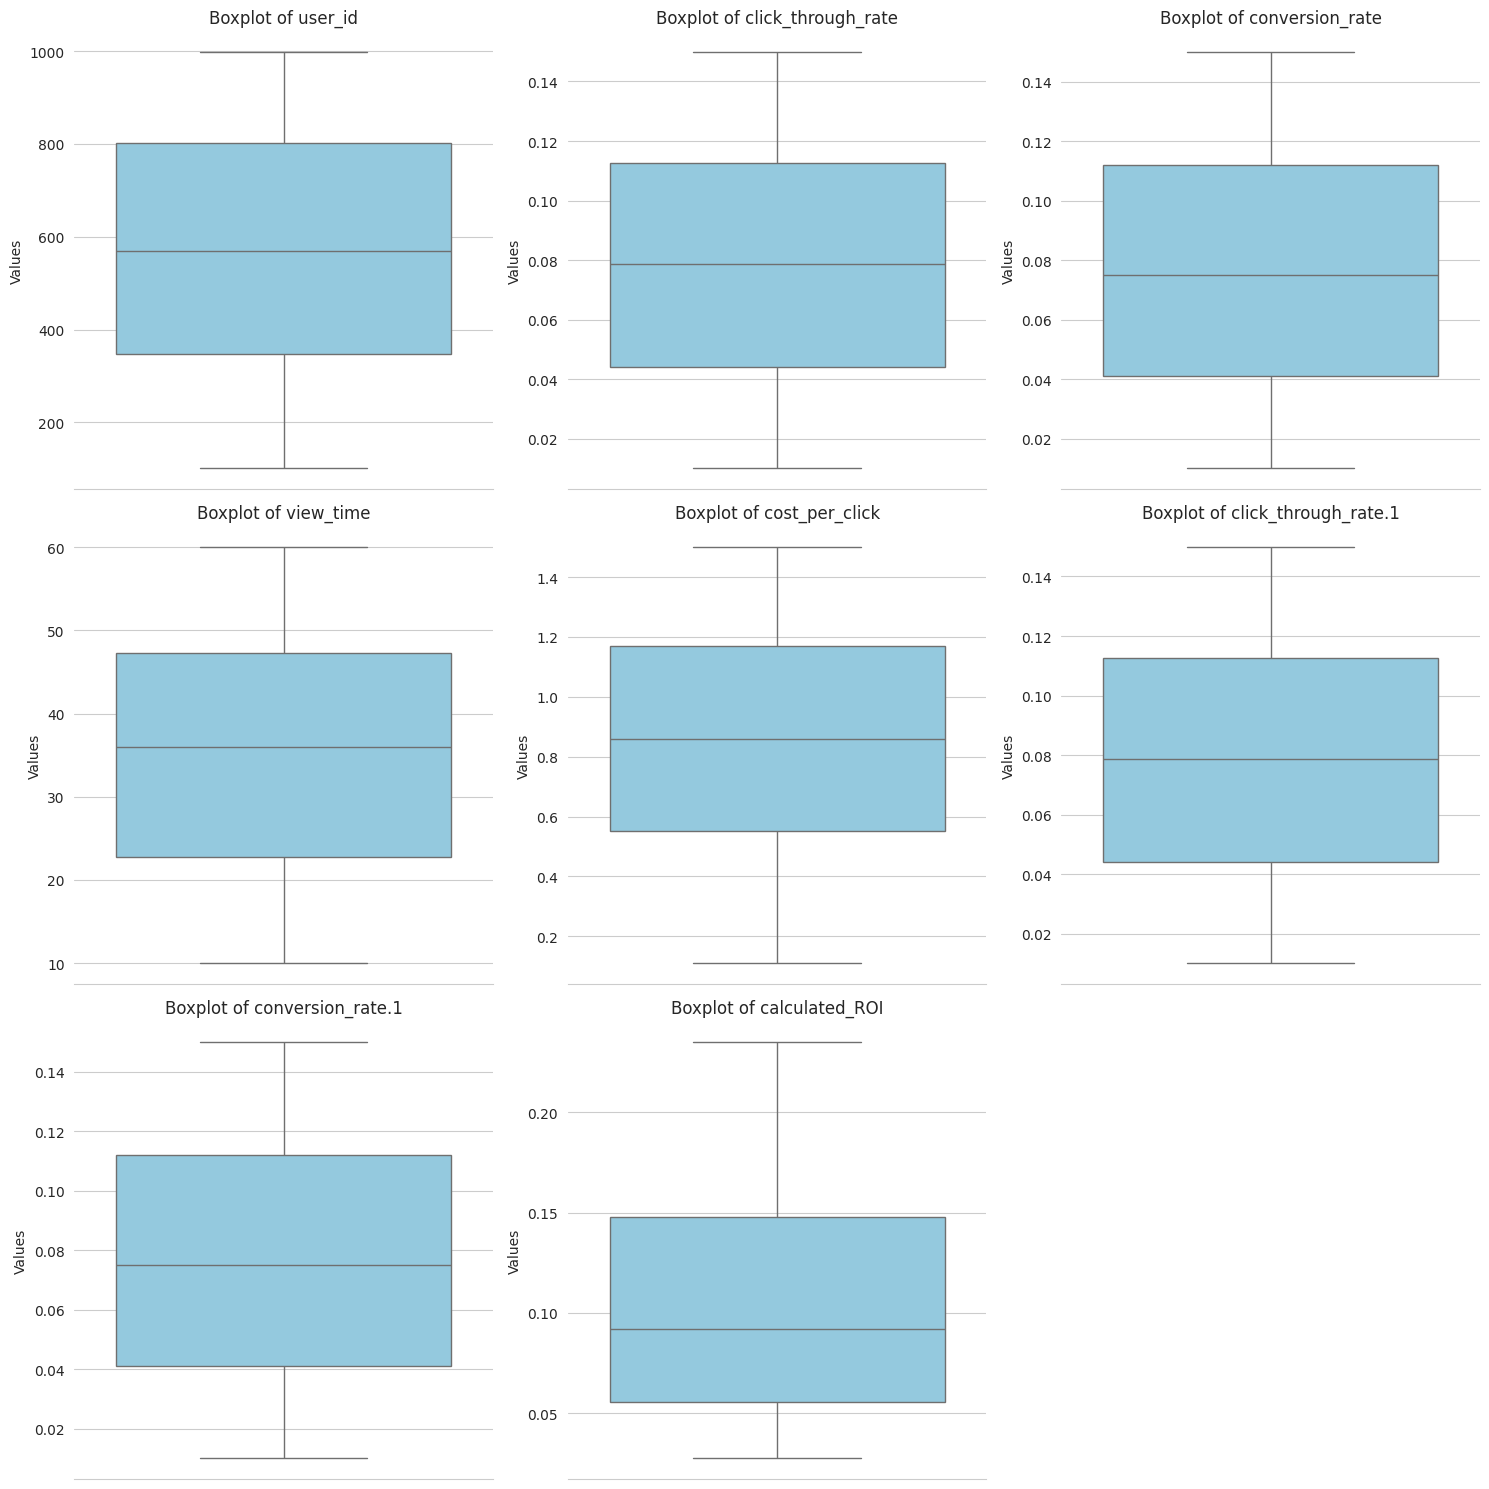

In [19]:
boxplot_numeric(df, numerical_columns_list)

nampaknya data yang outlayer sudah di bersihkan

3. Langkah tiga adalah dengan mengecek duplikatnya

In [20]:
df.duplicated().sum()

np.int64(0)

nampaknya tidak ada duplikat yang berlebihan d sini

**medeteksi kategorikal dan menyesuikan one-hot encoding pada data categorical**

nampaknya timestamp masih berbentuk string kategorikal maka kita ubah menjadi tipe datetime

In [21]:
df['timestamp'] = pd.to_datetime(df['timestamp'], format='%m/%d/%Y %H:%M')

melakukan sedikit penyesuain dengan menyamakan seluruh kolom ke huruf kecil

In [22]:
for column in categorical_list:
    df[column] = df[column].str.lower()

melihat kembali nilai kategorikal pada semua kolom kategorikal dengan semua data kategorikal

In [23]:
df["Performance"].unique()

array(['low', 'high', 'medium'], dtype=object)

In [24]:
for column in categorical_list:
    print(df[column].unique())

['desktop' 'mobile' 'tablet']
['usa' 'uk' 'germany' 'canada' 'india']
['55+' '35-44' '45-54' '18-24' '25-34']
['female' 'male']
['text' 'image' 'video']
['health' 'fashion' 'automotive' 'electronics' 'travel']
['young adults' 'family oriented' 'travel lovers' 'fitness lovers'
 'tech enthusiasts']
['liked' 'commented' 'shared' 'ignored']
['low' 'high' 'medium']


In [25]:
import pandas as pd
import numpy as np

categorical_list = [
     "device_type",
     "location",
     "age_group",
     "gender",
     "content_type",
     "ad_topic",
     "ad_target_audience",
     "engagement_level",
     "Performance",
]


def split_and_clean(value):
    if pd.isna(value):
        return []
    if isinstance(value, str):
        value = value.lower()
        separators = ['|', '/', ',', '&', ';', '\\']
        for sep in separators:
            value = value.replace(sep, ',')
        return [v.strip() for v in value.split(',') if v.strip()]
    else:
        return [str(value).strip().lower()]

def split_klasifikasi(value):
    if pd.isna(value):
        return []
    if isinstance(value, str):
        separators = ['|', '/', ',', '&', ';', '\\']
        for sep in separators:
            value = value.replace(sep, ',')
        return [int(v.strip()) for v in value.split(',') if v.strip().isdigit()]
    elif isinstance(value, (list, np.ndarray)):
        return [int(v) for v in value]
    else:
        return [int(value)]

options_dict = {}

encoded_df = pd.DataFrame(index=df.index)

for column in categorical_list:
    all_values = df[column].apply(split_and_clean)
    unique_labels = sorted(set(label for sublist in all_values for label in sublist))
    options_dict[column] = unique_labels

    for label in unique_labels:
        encoded_df[f"{column}__{label}"] = all_values.apply(lambda x: int(label in x))

klasifikasi_values = df["Performance"].apply(split_klasifikasi)
unique_klasifikasis = sorted(set(c for sublist in klasifikasi_values for c in sublist))

for klasifikasi in unique_klasifikasis:
    encoded_df[f"Performance__{klasifikasi}"] = klasifikasi_values.apply(lambda x: int(klasifikasi in x))


print("Label unik dalam 'Performance':", unique_klasifikasis)


Label unik dalam 'Performance': []


In [26]:
print(df.isnull().sum())

user_id                 0
timestamp               0
device_type             0
location                0
age_group               0
gender                  0
ad_id                   0
content_type            0
ad_topic                0
ad_target_audience      0
click_through_rate      0
conversion_rate         0
engagement_level        0
view_time               0
cost_per_click          0
click_through_rate.1    0
conversion_rate.1       0
ROI_Category            0
calculated_ROI          0
Performance             0
dtype: int64


In [27]:
numerical_columns_list = df.select_dtypes(include=np.number).columns.tolist()


In [28]:
encoded_df[numerical_columns_list] = df[numerical_columns_list].fillna(0)


**menampilakan data hasil encoding**

In [29]:
encoded_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 908 entries, 0 to 999
Data columns (total 43 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   device_type__desktop                  908 non-null    int64  
 1   device_type__mobile                   908 non-null    int64  
 2   device_type__tablet                   908 non-null    int64  
 3   location__canada                      908 non-null    int64  
 4   location__germany                     908 non-null    int64  
 5   location__india                       908 non-null    int64  
 6   location__uk                          908 non-null    int64  
 7   location__usa                         908 non-null    int64  
 8   age_group__18-24                      908 non-null    int64  
 9   age_group__25-34                      908 non-null    int64  
 10  age_group__35-44                      908 non-null    int64  
 11  age_group__45-54        

**drop user_id karena tidak relevan untuk prediksi**

In [30]:
encoded_df.drop(columns=["user_id"], inplace=True)

In [31]:
encoded_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 908 entries, 0 to 999
Data columns (total 42 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   device_type__desktop                  908 non-null    int64  
 1   device_type__mobile                   908 non-null    int64  
 2   device_type__tablet                   908 non-null    int64  
 3   location__canada                      908 non-null    int64  
 4   location__germany                     908 non-null    int64  
 5   location__india                       908 non-null    int64  
 6   location__uk                          908 non-null    int64  
 7   location__usa                         908 non-null    int64  
 8   age_group__18-24                      908 non-null    int64  
 9   age_group__25-34                      908 non-null    int64  
 10  age_group__35-44                      908 non-null    int64  
 11  age_group__45-54        

In [32]:
encoded_df = encoded_df.sample(frac=1, random_state=42).reset_index(drop=True)

split_index = int(0.8 * len(encoded_df))

df_train = encoded_df[:split_index]
df_test = encoded_df[split_index:]


**melakukan split data untuk pelatihan model secara terpisah**

In [33]:
encoded_df_low = df_train.drop(columns=["Performance__high", "Performance__medium"])
encoded_df_medium = df_train.drop(columns=["Performance__high", "Performance__low"])
encoded_df_high = df_train.drop(columns=["Performance__medium", "Performance__low"])

**model_0**

medefinisikan nilai x dan y untuk pelatihan model

In [34]:
X = encoded_df_low.drop(columns="Performance__low")
y = encoded_df_low['Performance__low']

melakukan Undersampel

In [35]:
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)

In [36]:
print("Distribusi kelas asli:", Counter(y))

Distribusi kelas asli: Counter({0: 463, 1: 263})


split data latih dan test

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

menggunakan random forest

In [38]:
base_model_low = RandomForestClassifier(n_estimators=100, random_state=42)
base_model_low.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

melakukan prediksi dengan model dari data test

In [39]:
y_pred = base_model_low.predict(X_test)

melihat akurasu

In [40]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi Model 0: {accuracy}")

Akurasi Model 0: 1.0


melihat cm dari hasil data test

In [41]:
cm = confusion_matrix(y_test, y_pred)


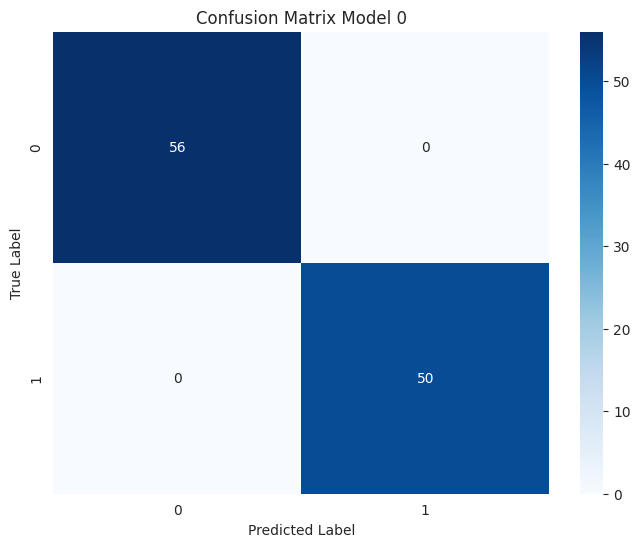

In [42]:
plt.figure(figsize=(8, 6))  # Atur ukuran gambar
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
               xticklabels=['0', '1'], yticklabels=['0', '1'])  # Ganti label jika perlu
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Model 0')
plt.show()

**model 1**

mnedefinisikan lagi x ddan y untuk model lain

In [43]:
X = encoded_df_medium.drop(columns="Performance__medium")
y = encoded_df_medium['Performance__medium']

kali ini mencoba oversampel

In [44]:
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

In [45]:
print("Distribusi kelas asli:", Counter(y_resampled))

Distribusi kelas asli: Counter({1: 459, 0: 459})


melakukan split lagi untuk model baru

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

kembali menggunakan random forst

In [47]:
base_model_medium = RandomForestClassifier(n_estimators=100, random_state=42)
base_model_medium.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

melakukan prediksi dengan model baru dalam kasus ini model medium

In [48]:
y_pred = base_model_medium.predict(X_test)

In [49]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi Model 1: {accuracy}")

Akurasi Model 1: 1.0


melakukan pengecekan cm nya

In [50]:
cm = confusion_matrix(y_test, y_pred)


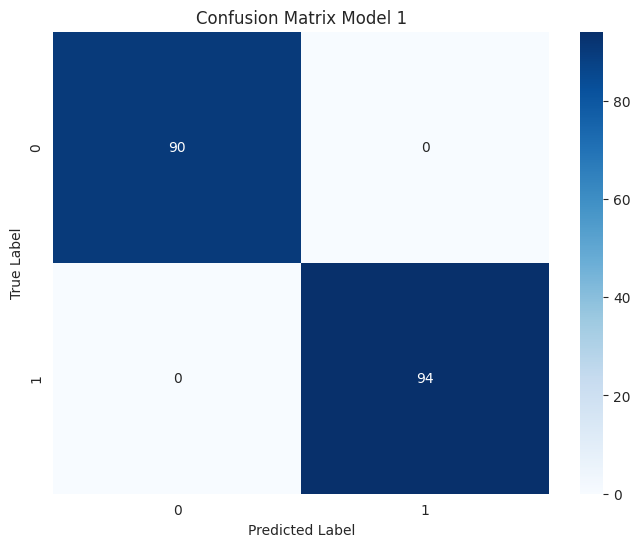

In [51]:
plt.figure(figsize=(8, 6))  # Atur ukuran gambar
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
               xticklabels=['0', '1'], yticklabels=['0', '1'])  # Ganti label jika perlu
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Model 1')
plt.show()

**model 2**

mendefinisikan lagi data x dan y nya

In [52]:
X = encoded_df_high.drop(columns="Performance__high") # Ganti dengan kolom fitur Anda
y = encoded_df_high['Performance__high']  # Ganti dengan kolom target Anda

mencoba undersampel lagi

In [53]:
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)

In [54]:
print("Distribusi kelas asli:", Counter(y_resampled))

Distribusi kelas asli: Counter({0: 196, 1: 196})


split dataset lagi

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

melakukan permodelna dengan logistik regresion kali ini

In [56]:
base_model_high = LogisticRegression(solver='lbfgs', max_iter=1000)
base_model_high.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

melihat prediksi lagi

In [57]:
y_pred = base_model_high.predict(X_test)

melihat hasil akurasi dari prediksi

In [58]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi Model 2: {accuracy}")

Akurasi Model 2: 0.9113924050632911


memantau cm dari data nya

In [59]:
cm = confusion_matrix(y_test, y_pred)

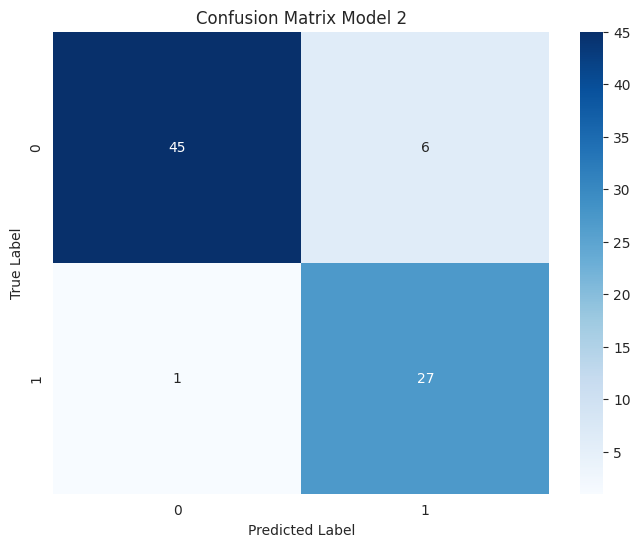

In [60]:
plt.figure(figsize=(8, 6))  # Atur ukuran gambar
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
               xticklabels=['0', '1'], yticklabels=['0', '1'])  # Ganti label jika perlu
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Model 2')
plt.show()

**mengabungkan model**

melihat data yang akan digunaka untuk testing

In [61]:
df_test

,device_type__desktop,device_type__mobile,device_type__tablet,location__canada,location__germany,location__india,location__uk,location__usa,age_group__18-24,age_group__25-34,...,Performance__high,Performance__low,Performance__medium,click_through_rate,conversion_rate,view_time,cost_per_click,click_through_rate.1,conversion_rate.1,calculated_ROI
726,0,1,0,0,1,0,0,0,0,0,...,1,0,0,0.093486,0.0880,21,0.53,0.093486,0.0880,0.166038
727,0,0,1,1,0,0,0,0,0,0,...,0,1,0,0.050661,0.0127,44,1.43,0.050661,0.0127,0.027731
728,0,0,1,0,0,0,0,1,0,0,...,0,0,1,0.085066,0.0232,37,0.30,0.085066,0.0232,0.077333
729,1,0,0,0,0,1,0,0,1,0,...,0,0,1,0.042274,0.0667,14,0.73,0.042274,0.0667,0.091370
730,0,1,0,1,0,0,0,0,0,0,...,1,0,0,0.076491,0.0490,52,0.19,0.076491,0.0490,0.234808
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,0,0,1,1,0,0,0,0,1,0,...,0,1,0,0.135382,0.0292,44,1.33,0.135382,0.0292,0.027731
904,1,0,0,0,0,0,1,0,1,0,...,0,1,0,0.042488,0.0611,23,1.19,0.042488,0.0611,0.051345
905,0,1,0,0,0,1,0,0,0,0,...,0,1,0,0.060116,0.0605,26,1.09,0.060116,0.0605,0.055505
906,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0.010945,0.0352,25,0.43,0.010945,0.0352,0.081860


**melakukan uji pada gabungan model**

sekarang mempersipakan data testing dengan menghilangkan kolom label

In [62]:
y_true = df_test[["Performance__low","Performance__medium", 'Performance__high']].values

melakuakn prediksi dengan model low, medium, dan high

In [63]:
y_pred_0 = base_model_low.predict(df_test.drop(columns=["Performance__medium", "Performance__low", 'Performance__high']))
y_pred_1 = base_model_medium.predict(df_test.drop(columns=["Performance__medium", "Performance__low", 'Performance__high']))
y_pred_2 = base_model_high.predict(df_test.drop(columns=["Performance__medium", "Performance__low", 'Performance__high']))

y_pred = np.column_stack((y_pred_0, y_pred_1, y_pred_2))

y_pred = [[int(val) for val in row] for row in y_pred]


setelah mendapat data hasil testing dalam bentuk list seperti ini [1,0,0] maka akan di ubah menjadi nilai 0 = sama dengan medium dan begitu seterusnya hal ini dilakukan di bawah dengan np.argnmax

In [64]:
import numpy as np

y_true_real = np.argmax(y_true, axis=1)
y_pred_real = np.argmax(y_pred, axis=1)

In [65]:
print(y_true_real)

[2 0 1 1 2 1 0 1 0 0 0 2 1 2 0 2 0 1 2 1 0 2 1 1 2 1 1 0 1 0 2 0 1 2 0 0 1
 1 1 2 2 2 1 1 0 0 2 1 0 0 0 0 1 0 1 0 2 0 1 1 2 0 2 0 0 0 0 1 0 2 2 2 0 1
 2 0 0 0 2 0 1 2 2 2 2 2 0 0 1 0 2 1 0 0 1 2 0 0 1 0 1 2 2 1 1 0 2 1 0 2 0
 0 0 0 1 1 2 0 2 1 2 2 0 0 0 1 1 1 2 1 2 0 1 1 1 1 0 1 2 1 1 1 2 2 0 0 1 0
 0 1 2 1 0 2 1 2 2 1 1 0 2 0 1 1 0 1 1 2 1 0 0 2 1 0 2 2 1 0 0 0 1 2]


melihat metrik akurasi dan cm(confuliosional matriks) nya

In [66]:
accuracy = accuracy_score(y_true_real, y_pred_real)
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")

Accuracy: 0.967032967032967
Precision: 0.8842676311030742
Recall: 0.967032967032967
F1-score: 0.9165328412045969


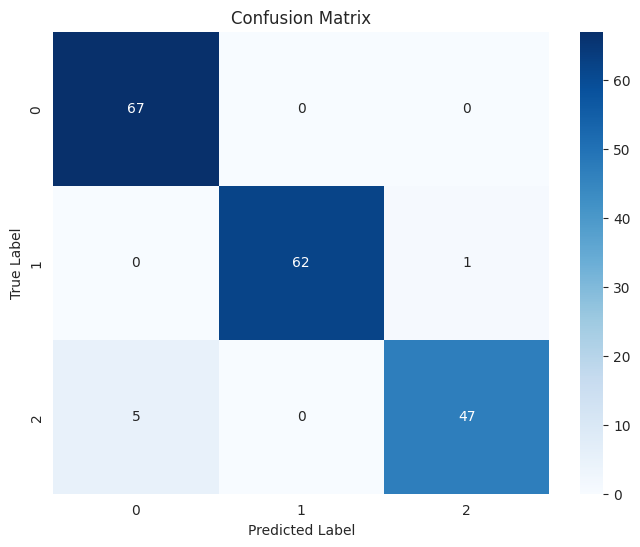

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


cm = confusion_matrix(y_true_real, y_pred_real)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['0', '1', '2'], yticklabels=['0', '1', '2'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

**save model input**

save model untuk dilakukan di aplikasi

In [68]:
joblib.dump(base_model_low, 'base_model_0.pkl')


joblib.dump(base_model_medium, 'base_model_1.pkl')


joblib.dump(base_model_high, 'base_model_2.pkl')

['base_model_2.pkl']

**mencoba melakukan uji coba bisa juga di lihat di app.py**

In [69]:
# all_columns = encoded_df.drop(columns=['Cluster__0', 'Cluster__1', 'Cluster__2']).columns.tolist()
# print(all_columns)

In [70]:
# grouped_features = defaultdict(list)
# for f in all_columns:
#     if '__' in f:
#         key, val = f.split('__', 1)
#         grouped_features[key.strip()].append(val.strip())

# # Menampilkan hasil
# for k, v in grouped_features.items():
#     print(f"{k} ({len(v)} items):")
#     print(v)
#     print()

In [71]:
# opsi_apm =  grouped_features["Ad Placement Method"]
# opsi_type_of_media = grouped_features["Type of Media (MOECM)"]
# opsi_outlet_channel = grouped_features["Outlet Channel (Agency submission)"]
# opsi_language = grouped_features["Language"]
# opsi_purpose = grouped_features["Purpose"]

# for i in range(len(opsi_apm)):
#      print(f"{i+1}. {opsi_apm[i]}")
# Ad_Placement_Method = input("Ad Placement Method: ")
# a = f"Ad Placement Method__{Ad_Placement_Method.lower()}"
# for i in range(len(opsi_type_of_media)):
#      print(f"{i+1}. {opsi_type_of_media[i]}")
# Type_of_Media = input("Type of Media (MOECM): ")
# b = f"Type of Media (MOECM)__{Type_of_Media.lower()}"
# for i in range(len(opsi_outlet_channel)):
#      print(f"{i+1}. {opsi_outlet_channel[i]}")
# Outlet_Channel = input("Outlet Channel (Agency submission): ")
# c = f"Outlet Channel (Agency submission)__{Outlet_Channel.lower()}"
# for i in range(len(opsi_language)):
#      print(f"{i+1}. {opsi_language[i]}")
# Language = input("Language: ")
# d = f"Language__{Language.lower()}"
# for i in range(len(opsi_purpose)):
#      print(f"{i+1}. {opsi_purpose[i]}")
# Purpose = input("Purpose: ")
# e = f"Purpose__{Purpose.lower()}"
# Spend_Amount = input("Spend Amount: ")


In [72]:
# selected_features = {a, b, c, d, e}
# feature = [1 if i in selected_features else 0 for i in all_columns]

In [73]:
# print(Spend_Amount)

In [74]:
# feature[-1] = (float(Spend_Amount))

In [75]:
# feature_list = []
# feature_list.append(feature)

In [76]:
# print(feature_list)

In [77]:
# len(all_columns)

In [78]:
# len(feature_list[0])

In [79]:
# X_input = np.array(feature_list)

In [80]:
# print(X_input)

In [81]:
# y_pred_0 = base_model_0.predict(X_input)
# y_pred_1 = base_model_1.predict(X_input)
# y_pred_2 = base_model_2.predict(X_input)

# # Gabungkan hasil prediksi menjadi multi-label
# y_pred = np.column_stack((y_pred_0, y_pred_1, y_pred_2))

# # Konversi ke list of lists of int
# y_pred = [[int(val) for val in row] for row in y_pred]


In [82]:
# y_pred_ku = np.argmax(y_pred, axis=1)

In [83]:
# print(y_pred_ku)